<a href="https://colab.research.google.com/github/madhurapg/Remote-Sensing/blob/master/Ships_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ships in Satellite imagery - Classify ships in San Franciso Bay using Planet satellite imagery
 
### Madhura Gurav

In [0]:
!pip install tifffile

     |████████████████████████████████| 133kB 3.4MB/s 
     |████████████████████████████████| 18.1MB 194kB/s 


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
import json 
from skimage.color import rgb2gray 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**S1:**

Based on the Kaggle competition "Ships in Satellite Imagery".

<br>
Data Sources:

https://www.kaggle.com/rhammell/ships-in-satellite-imagery

https://www.kaggle.com/akshaymewada7/ships-in-satellite-imagery-dataset-using-sklearn





In [0]:
#Loading and viewing the data
data_file = open('/content/drive/My Drive/Prj_data_650/shipsnet.json')
data = json.load(data_file)
Shipsnet= pd.DataFrame(data) # Converting the json file into a pandas dataframe
print(Shipsnet.head())
print(Shipsnet.shape)

                                                data  ...             scene_ids
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...  ...  20180708_180909_0f47
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...  ...  20170705_180816_103e
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...  ...  20180712_211331_0f06
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...  ...  20170609_180756_103a
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...  ...  20170515_180653_1007

[5 rows x 4 columns]
(4000, 4)


In [0]:
#Print the column names
for col in Shipsnet.columns:
  print(col)

data
labels
locations
scene_ids


In [0]:
#Labels
labels = Shipsnet.labels.unique()
print(labels)
print('Number of labels: ' + str(len(labels)))

[1 0]
Number of labels: 2


In [0]:
x = np.array(data['data']).astype('uint8')
y = np.array(data['labels']).astype('uint8')

print('Total number of images: {}'.format(len(x)))
print('Number of NoShip Images: {}'.format(np.sum(y==0)))
print('Number of Ship Images: {}'.format(np.sum(y==1)))
print('Image shape (Width, Height, Channels): {}'.format(x[0].shape))


Total number of images: 4000
Number of NoShip Images: 3000
Number of Ship Images: 1000
Image shape (Width, Height, Channels): (19200,)


In [0]:
x.shape
x[0].shape

(19200,)

**- Number of images in this dataset:   4000**

**- Number of different labels in this dataset:   2**

**- Size of each image in this dataset:   19200 = (80 x 80 x 3)**

#**S2:**

Select all "ship" images, convert 3-channel (RGB) images to single-channel (Gray). 

Flatten the images into a data matrix 

Apply PCA on them. 

Display the first 4 principal components as 2D images.



In [0]:
#reshape images
n_channel = 3 # color chanel (RGB)
weight = 80
height = 80
X = x.reshape([-1, weight, height, n_channel], order='F')
print(X.shape)

#convert one image to grayscale
grayscale = rgb2gray(X[0])
print(grayscale.shape)
print(X[0].shape)

(4000, 80, 80, 3)
(80, 80)
(80, 80, 3)


In [0]:
#plot grayscale image
fig, axes = plt.subplots(figsize=(5,5))

axes.imshow(grayscale, cmap=plt.cm.gray)  
axes.set_title("Grayscale")

plt.show()

In [0]:
#Converting everything to greyscale
X_gray = [rgb2gray(i) for i in X]
X_gray = np.array(X_gray)
X_gray.shape

(4000, 80, 80)

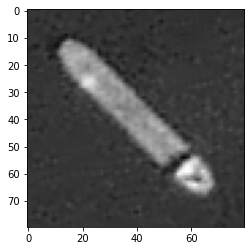

In [0]:
# Plot grayscale image
plt.imshow(X_gray[5], cmap=plt.cm.gray)

In [0]:
#Select ship images
Ships_x = X_gray[y==1] 
print(Ships_x.shape)

#Convert to a 2D matrix. 
Ships_x = Ships_x.reshape(len(Ships_x), -1)
print(Ships_x.shape)

#labels
Ships_y = y[y==1]
print(Ships_y.shape)

(1000, 80, 80)
(1000, 6400)
(1000,)


In [0]:
# Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

NUM_COMP = 30
scaler = StandardScaler()
scaler.fit(Ships_x)
X = scaler.transform(Ships_x)

pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
shipsPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])

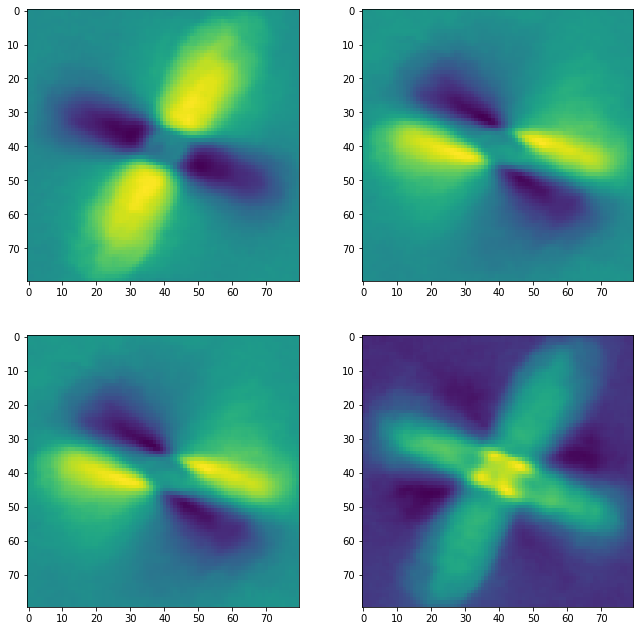

In [0]:
## Display eigenvectors
imgSize = np.array(grayscale.shape)
fig, axs = plt.subplots(2, 2, figsize = [ 11, 11])
for i in np.arange(0,2):
    for j in np.arange(0,2):
        ind = i+j+1
        pImg = np.array(pcaMdl.components_[ind,:]).reshape(imgSize)
        axs[i,j].imshow(pImg)
plt.show()

In [0]:
print(pcaMdl.explained_variance_ratio_) #Variance explaied with each additional PCA component
print(np.sum(pcaMdl.explained_variance_ratio_)) #Total variance explaied by 30 PCA components

[0.5726031  0.07400614 0.04879832 0.03789406 0.02644712 0.02455656
 0.01489694 0.01394987 0.01049745 0.008053   0.0079676  0.00773462
 0.00651328 0.00615719 0.00441882 0.00423758 0.0040601  0.00355913
 0.00339659 0.00328319 0.00289334 0.00276312 0.00251374 0.00240156
 0.00223638 0.00220592 0.00203101 0.00192601 0.00181043 0.00174988]
0.9055620658310635


In [0]:
print(np.sum(pcaMdl.explained_variance_ratio_[0:5])) #Variance explaied by first 5 PCA components

0.7597487521420114


**- Number of "ship" images:   1000**

**- Total variance explained by the first 5 PCA components:   0.76**

**- Number of PCA components required to explain at least 50% of the variance:   1**

#**S3:**

Select all images, convert 3-channel (RGB) images to single-channel (Gray).

Flatten the images into a data matrix.

Apply PCA on them. 

Display the first 4 principal components as 2D images.



In [0]:
#Convert to a 2D matrix. 
X_gray_1 = X_gray.reshape(len(X_gray), -1)
print(X_gray_1.shape)

(4000, 6400)


In [0]:
# Apply PCA
NUM_COMP = 30
scaler = StandardScaler()
scaler.fit(X_gray_1)
X = scaler.transform(X_gray_1)

pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
shipsPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])

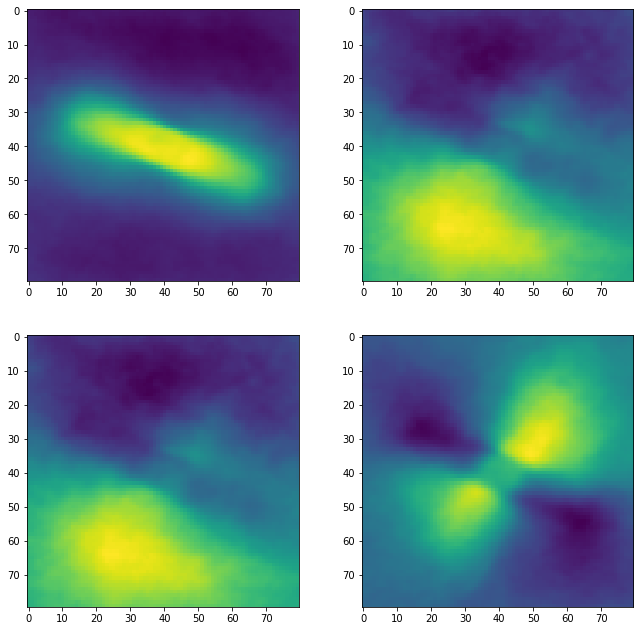

In [0]:
## Display eigenvectors
imgSize = np.array(grayscale.shape)
fig, axs = plt.subplots(2, 2, figsize = [ 11, 11])
for i in np.arange(0,2):
    for j in np.arange(0,2):
        ind = i+j+1
        pImg = np.array(pcaMdl.components_[ind,:]).reshape(imgSize)
        axs[i,j].imshow(pImg)
plt.show()

In [0]:
print(pcaMdl.explained_variance_ratio_) #Variance explaied with each additional PCA component
print(np.sum(pcaMdl.explained_variance_ratio_)) #Total variance explained by 30 PCA components

[0.49798893 0.05048711 0.0321661  0.02800318 0.02484396 0.02248636
 0.01477592 0.01256381 0.01032048 0.01005263 0.00882077 0.00837915
 0.00827026 0.00797742 0.00700271 0.00622883 0.00593862 0.00572578
 0.00530168 0.00474646 0.00466867 0.00450071 0.00403612 0.00382032
 0.00358331 0.0034333  0.00331968 0.00319613 0.00304141 0.0030266 ]
0.8087064094222235


In [0]:
print(np.sum(pcaMdl.explained_variance_ratio_[0:5])) #Variance explained by first 5 PCA components

0.6334892757962532


**- Total variance explained by the first 5 PCA components:   0.63**

**- Number of PCA components required to explain at least 50% of the variance:   2**

**- The differences in variance between S3 and S2 can be explained by: fewer PCA components from S2 are required to explain the same amount of variance in S3, since the PCA was carried out using only the ship images in S2**

#**S4:**
Apply k-means clustering on all "ship" images for 4 clusters. Calculate the "mean" image for each cluster and display it.



In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Ships_x_scaled = scaler.fit_transform(Ships_x)

In [0]:
#Creating 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(Ships_x_scaled)
kmeans.cluster_centers_.shape

(4, 6400)

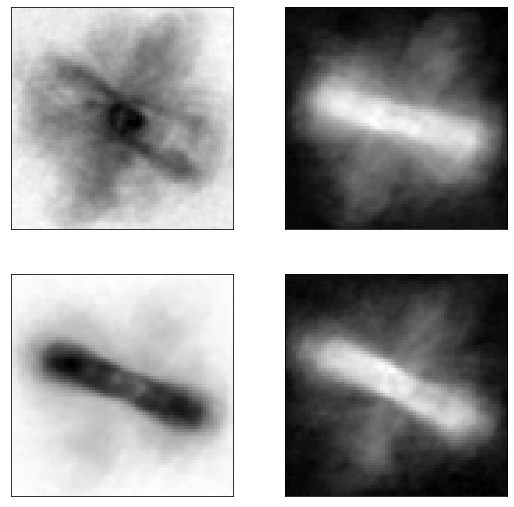

In [0]:
#Plotting the mean image of the 4 clusters
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
centers = kmeans.cluster_centers_.reshape(4, 80, 80)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [0]:
labels = kmeans.labels_

In [0]:
# Accuracy score for k-means clustering on all "ship" images for 4 clusters
from sklearn.metrics import accuracy_score
accuracy_score(Ships_y, labels)

0.147

**- There is a common pattern for clusters 2, 3 and 4. The ships seem to be grouped based on orientation and image intensity in these 3 clusters. the First cluster has the least image defination and the cluster 4 seems to have the maximum sharpness**

#**S5:**
Apply k-means clustering on all images for 2 clusters. 



In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_gray_1_scaled = scaler.fit_transform(X_gray_1)

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_gray_1_scaled)
kmeans.cluster_centers_.shape

(2, 6400)

In [0]:
labels = kmeans.labels_

In [0]:
#Accuracy score of kmeans clustering to discriminate ships from non-ship images
accuracy_score(y, labels)

0.46375

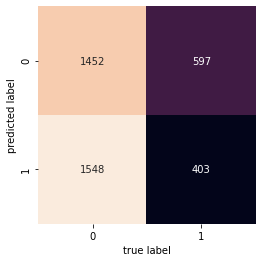

In [0]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

**- Accuracy of clustering to discriminate ships from non-ship images. 0.46375**


#**S6:**
Split the data into train and test sets (50/50 split). Train a linear SVM with default parameters. Apply it on the test dataset.



In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from sklearn import preprocessing

In [0]:
# Select balanced training data
indPos = np.where(y==1)[0]
indNeg = shuffle(np.where(y==0)[0], random_state=42)[0:indPos.shape[0]]

indBal = shuffle(np.concatenate([indPos,indNeg]), random_state=42)

XBal = X_gray_1[indBal, :]
YBal = y[indBal]

scaler = preprocessing.StandardScaler().fit(XBal)
XBalSc = scaler.transform(XBal)

X_train, X_test, y_train, y_test = train_test_split(XBalSc, YBal, stratify = YBal, train_size = 0.5)

In [0]:
svc = SVC(kernel='linear', probability=True)

print('Train size: ' + str(y_train.shape[0]))

# Training the model
print('Training the model ...')
svc.fit(X_train, y_train)

print('Applying the model ...')
yPred = svc.predict(X_test)

Train size: 1000
Training the model ...
Applying the model ...


In [0]:
yPred_proba = svc.predict_proba(X_test)

yPred_proba = yPred_proba[:, 1]

In [0]:
print( ' Testing Accuracy: ' + str(100 * np.sum(yPred==y_test) / y_test.shape[0]))

 Testing Accuracy: 81.7


In [0]:
yPred_train = svc.predict(X_train)
print( ' Training Accuracy: ' + str(100 * np.sum(yPred_train==y_train) / y_train.shape[0]))

 Training Accuracy: 100.0


In [0]:
#Calculating the Area under the Curve (AUC)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresh = roc_curve(y_test, yPred_proba)
aucVal = auc(fpr, tpr)
print('AUC is: ' + str(aucVal))

AUC is: 0.8875680000000001


**- Training accuracy: 100%**

**- Testing accuracy: 81.7**

**- Area under the curve (AUC): 0.887568**

#**S7:**
Train the best classifier: Using parameter optimization, different classifiers, feature dimensionality reduction, or any other processing step for feature extraction on the data.






In [0]:
#Obtaining balanced data (X_pilot, y_pilot) for the gridsearch CV
indPos = np.where(y==1)[0]
indNeg = shuffle(np.where(y==0)[0], random_state=42)[0:indPos.shape[0]]

indBal = shuffle(np.concatenate([indPos,indNeg]), random_state=42)

XBal = X_gray_1[indBal, :]
YBal = y[indBal]

scaler = preprocessing.StandardScaler().fit(XBal)
XBalSc = scaler.transform(XBal)

X_pilot, X_not, y_pilot, y_not = train_test_split(XBalSc, YBal, stratify = YBal, train_size = 0.2)

In [0]:
#Gridsearch CV to identify the the best paramters
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_pilot, y_pilot)

clf.cv_results_

{'mean_fit_time': array([0.63076777, 0.62760525, 0.62696114, 0.6280273 , 1.0837543 ,
        0.76831241, 1.08934708, 0.62508745, 1.0846283 , 0.81447039,
        1.08611865, 0.80973644]),
 'mean_score_time': array([0.12194366, 0.12211618, 0.12128963, 0.12096181, 0.25437527,
        0.18494759, 0.25204096, 0.14554691, 0.25234728, 0.13777943,
        0.25110664, 0.13631959]),
 'mean_test_score': array([0.8275, 0.8275, 0.8275, 0.8275, 0.8625, 0.855 , 0.8725, 0.89  ,
        0.8725, 0.89  , 0.8725, 0.89  ]),
 'param_C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[--, --, --, --, 0.001, 0.0001, 0.001, 0.0001, 0.001,
                    0.0001, 0.001, 0.0001],
              mask=[ True,  True,  True,  True, False, False, False, False,
                    

In [0]:
#List of best parameters
clf.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [0]:
# K-fold crossvalidation
NUM_FOLD = 10 

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

yPredAll = np.zeros(y.shape[0])
accAll = np.zeros(NUM_FOLD)

svc = SVC(C = 10, gamma = 0.0001, kernel = 'rbf')

indFold = 0
for train_index, test_index in kf.split(X):

    XTrain   = X_gray_1_scaled[train_index]
    yTrain = y[train_index]

    XTest    = X_gray_1_scaled[test_index]
    yTest  = y[test_index]

    ### Training the model
    print('Training the model for fold: ' + str(indFold))
    svc.fit(XTrain, yTrain)

    yPred = svc.predict(XTest)

    # accuracy for the current fold only    
    accFold = np.sum(yPred==yTest) / yTest.shape[0]
    accAll[indFold] = accFold
    print('  Acc : ' + str(accFold))
    
    yPredAll[test_index] = yPred

    indFold = indFold + 1

# Average accuracy over all folds
accAvg = np.mean(accAll)
print('Avg Acc. :' + str(accAvg))

acc =  np.sum(y==yPredAll) / y.shape[0]
print('Acc. for the combined folds :' + str(acc))

Training the model for fold: 0
  Acc : 0.8975
Training the model for fold: 1
  Acc : 0.875
Training the model for fold: 2
  Acc : 0.9575
Training the model for fold: 3
  Acc : 1.0
Training the model for fold: 4
  Acc : 0.9975
Training the model for fold: 5
  Acc : 0.9825
Training the model for fold: 6
  Acc : 0.9825
Training the model for fold: 7
  Acc : 0.96
Training the model for fold: 8
  Acc : 0.9375
Training the model for fold: 9
  Acc : 0.925
Avg Acc. :0.9515
Acc. for the combined folds :0.9515


**- 10-fold testing accuracy of the classifier: 0.9515**